<a href="https://colab.research.google.com/github/leonaardoas/Estimador-de-Precos-de-Residencias-SP/blob/main/estimador_de_pre%C3%A7os_de_resid%C3%AAncias_em_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**VISUALIZAÇÃO DE DADOS**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Projetos Machine Learning /Casas SP/sao-paulo-properties.csv')
df


,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,Jabaquara/São Paulo,sale,apartment,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara/São Paulo,sale,apartment,-23.652060,-46.637046


In [3]:
df['Negotiation Type'].value_counts()

rent    7228
sale    6412
Name: Negotiation Type, dtype: int64

In [4]:
df_rent = df[df['Negotiation Type']=='rent']
df_rent

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,0,Brooklin/São Paulo,rent,apartment,-23.617682,-46.694963
11206,21000,3000,208,4,4,3,3,1,1,1,0,Brooklin/São Paulo,rent,apartment,-23.606891,-46.695934
11207,3800,710,55,1,1,0,1,0,1,1,0,Brooklin/São Paulo,rent,apartment,0.000000,0.000000
11208,5000,2354,205,3,2,1,2,1,0,0,0,Brooklin/São Paulo,rent,apartment,-23.612287,-46.681482


In [5]:
df_rent.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000
mean,3077.669065,825.194798,89.486165,2.304234,2.105562,1.024488,1.452269,0.299806,0.172939,0.487963,0.000830,-22.032278,-43.500873
std,3522.830284,835.621937,63.976416,0.829108,0.998162,0.884241,0.889535,0.458205,0.378220,0.499890,0.028802,5.962534,11.675070
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.749039,-58.364352
25%,1350.000000,395.750000,52.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.598066,-46.689788
50%,2000.000000,595.000000,67.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.555869,-46.644793
75%,3300.000000,990.000000,100.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.522756,-46.585110
max,50000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Condo'}>,
        <Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Rooms'}>],
       [<Axes: title={'center': 'Toilets'}>,
        <Axes: title={'center': 'Suites'}>,
        <Axes: title={'center': 'Parking'}>,
        <Axes: title={'center': 'Elevator'}>],
       [<Axes: title={'center': 'Furnished'}>,
        <Axes: title={'center': 'Swimming Pool'}>,
        <Axes: title={'center': 'New'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

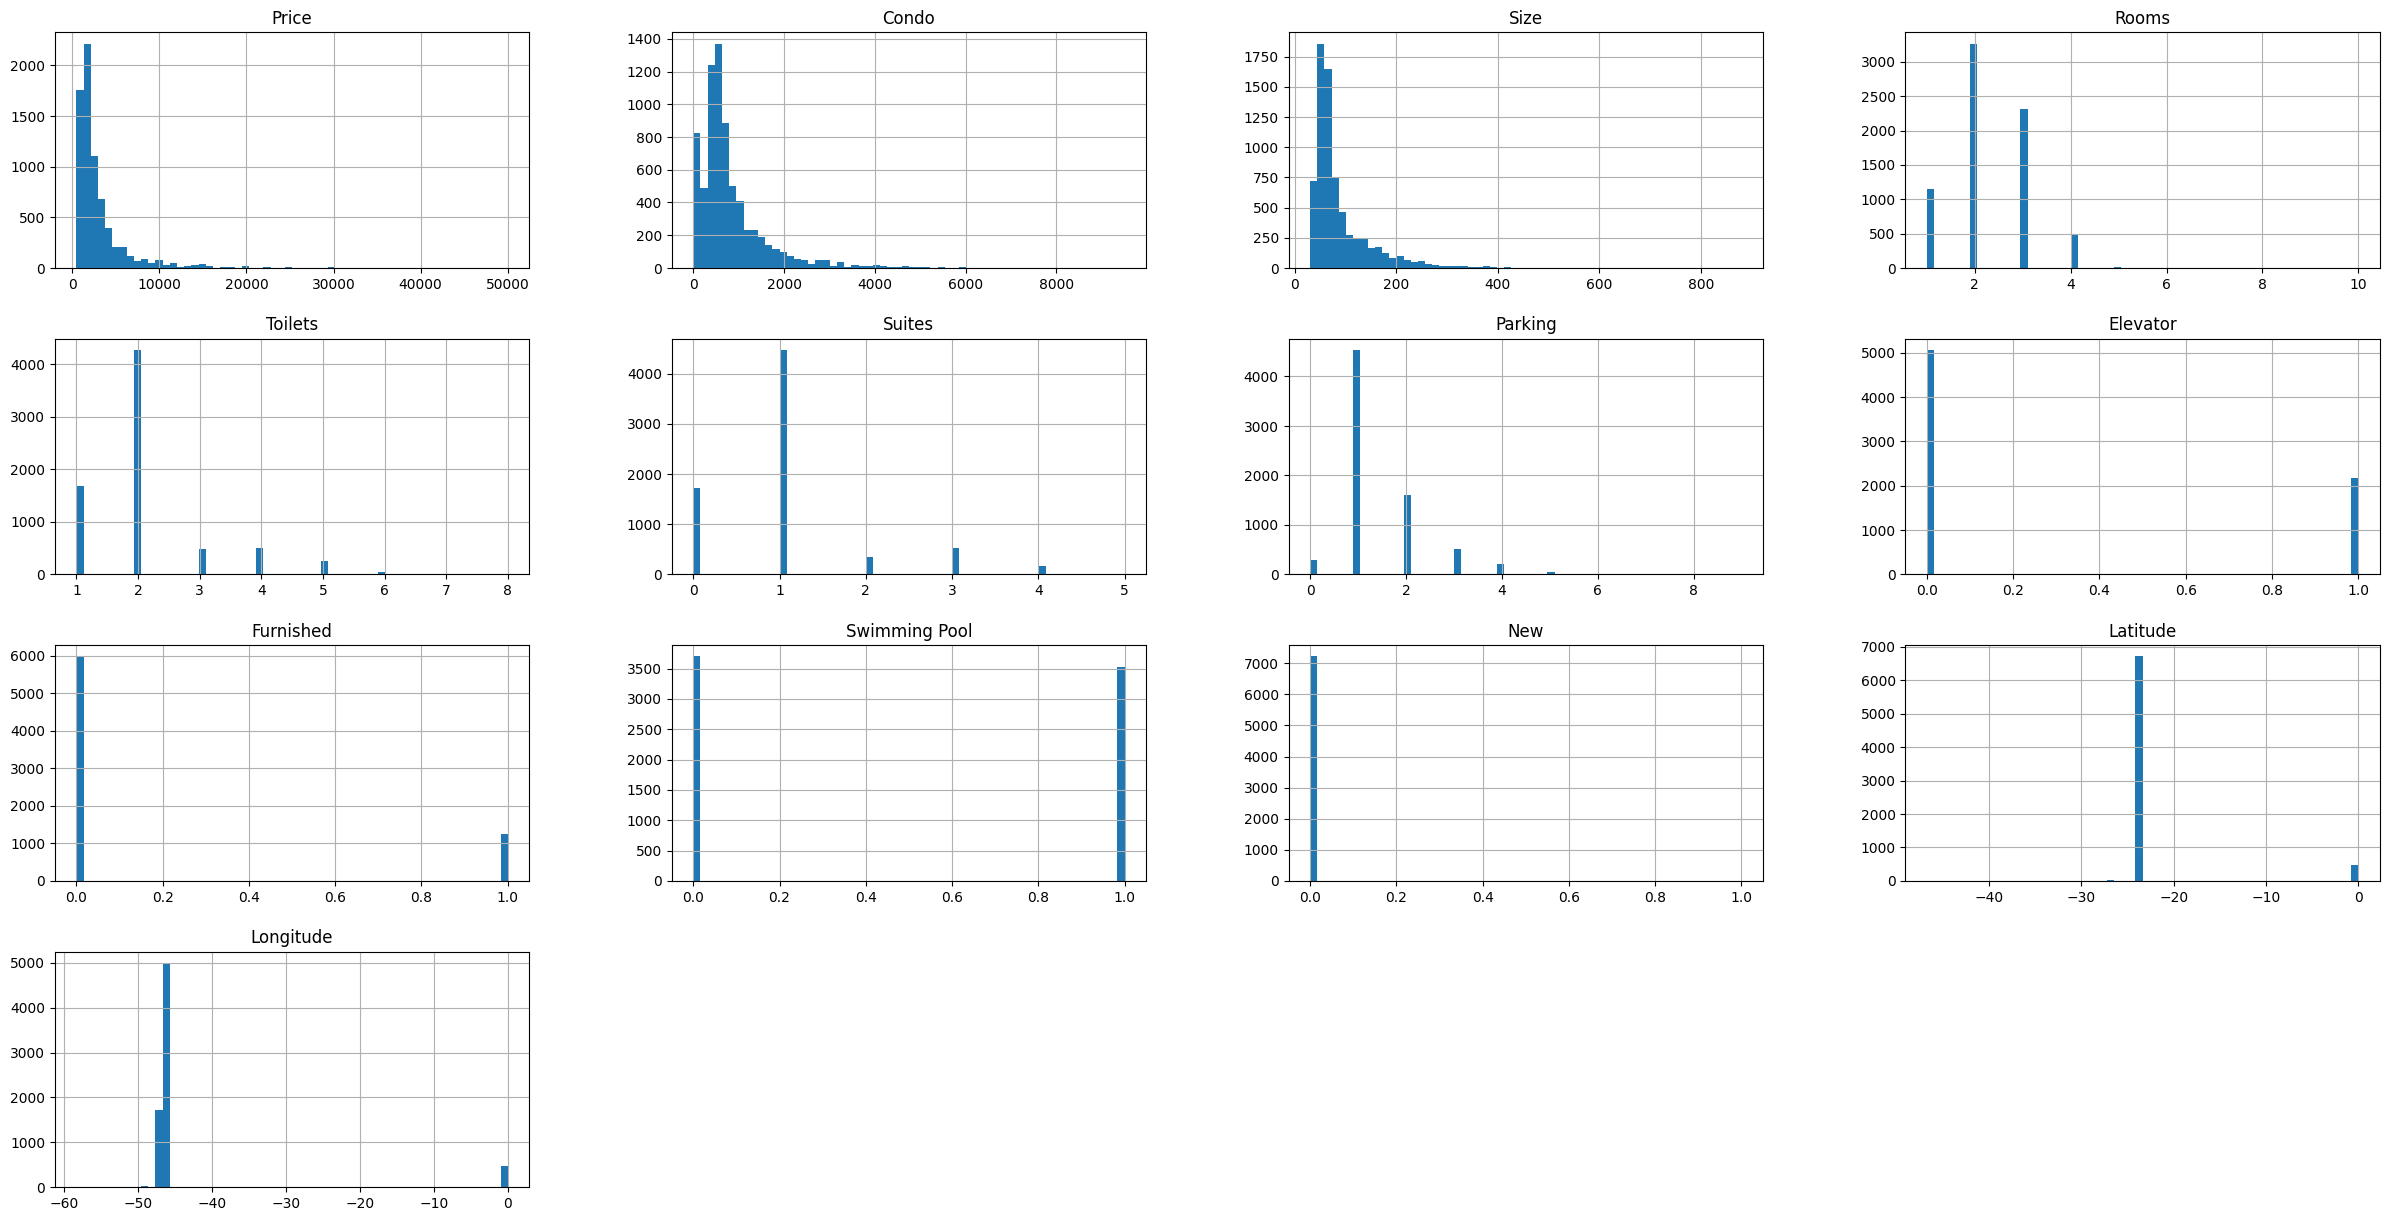

In [6]:
df_rent.hist(bins=60, figsize=(30,15)) #só meter um clickzin pra aumentar os gráficos de frequ~encia abaixo

In [7]:
df_rent['District'].value_counts()

Mooca/São Paulo              178
Moema/São Paulo              163
Vila Mariana/São Paulo       161
Morumbi/São Paulo            159
Pinheiros/São Paulo          153
                            ... 
Lajeado/São Paulo              8
Guaianazes/São Paulo           6
Parque do Carmo/São Paulo      6
Jardim São Luis/São Paulo      3
Grajaú/São Paulo               2
Name: District, Length: 94, dtype: int64

In [8]:
corr = df_rent.corr()
print(corr['Price'].sort_values(ascending=False))

Price            1.000000
Size             0.731795
Condo            0.700361
Parking          0.640743
Suites           0.588329
Toilets          0.583488
Rooms            0.390951
Swimming Pool    0.206884
Furnished        0.171859
Elevator         0.031860
New             -0.008477
Latitude        -0.036935
Longitude       -0.038362
Name: Price, dtype: float64


<ipython-input-8-6abb7df87024>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_rent.corr()


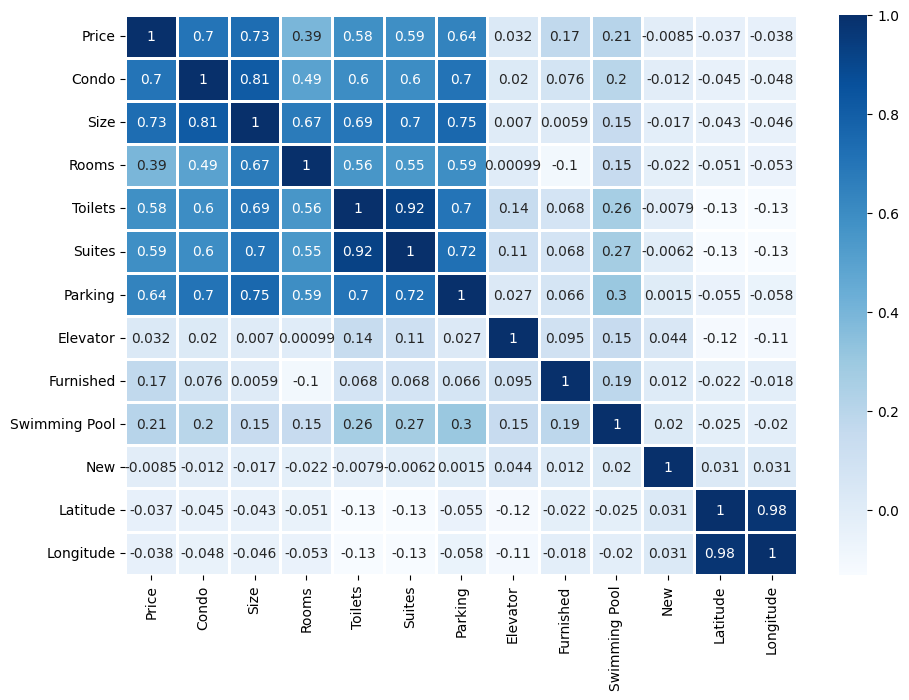

In [9]:
# Ajuste o espaçamento na figura (fig) usando a função subplots_adjust
fig, ax = plt.subplots(figsize=(12, 8))
fig.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)  # Ajuste esses valores de acordo com suas necessidades

# Crie o heatmap
sns.heatmap(corr, cmap='Blues', linewidth=2, annot=True)

# Mostre o gráfico
plt.show()

**TRATAMENTO DE DADOS**

In [10]:
df_rent

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,0,Brooklin/São Paulo,rent,apartment,-23.617682,-46.694963
11206,21000,3000,208,4,4,3,3,1,1,1,0,Brooklin/São Paulo,rent,apartment,-23.606891,-46.695934
11207,3800,710,55,1,1,0,1,0,1,1,0,Brooklin/São Paulo,rent,apartment,0.000000,0.000000
11208,5000,2354,205,3,2,1,2,1,0,0,0,Brooklin/São Paulo,rent,apartment,-23.612287,-46.681482


In [11]:
text = ['New',	'Negotiation Type',	'Property Type']
df_cleaned = df.drop(text, axis=1)

In [12]:
one_hot = pd.get_dummies(df_cleaned['District'])

dataset = df_cleaned.drop('District', axis=1)
dataset = dataset.join(one_hot)
dataset

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,930,220,47,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000,148,45,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000,100,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000,200,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1300,410,55,2,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13636,545000,630,74,3,2,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13637,515000,1100,114,3,3,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13638,345000,48,39,1,2,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


**CONJUNTO DE TREINO E TESTE**

In [13]:
X = dataset.iloc[:,1:]
y = dataset['Price']
y

0           930
1          1000
2          1000
3          1000
4          1300
          ...  
13635    265000
13636    545000
13637    515000
13638    345000
13639    161987
Name: Price, Length: 13640, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [15]:
y_test #mesmo índice do x_test

1531       2400
10936      6000
7777     350000
1354       2590
1190       1850
          ...  
9533       3000
5404       3400
7580     350000
5041     850000
10583      4500
Name: Price, Length: 2728, dtype: int64

In [16]:
x_test #mesmo índice do y_test

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,Latitude,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
1531,970,82,2,2,1,1,0,0,0,-23.577980,...,0,0,0,0,1,0,0,0,0,0
10936,1900,215,4,5,4,2,1,0,1,0.000000,...,0,0,0,0,0,0,0,0,0,0
7777,550,50,2,2,1,1,1,1,1,-23.541847,...,0,0,0,0,0,0,0,0,0,0
1354,1335,120,3,3,1,2,1,0,1,-23.646780,...,0,0,0,0,0,0,0,0,0,0
1190,1400,43,1,2,1,1,1,1,0,-23.569191,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9533,1469,145,3,5,2,2,0,0,1,-23.599178,...,0,0,0,0,0,0,0,0,0,0
5404,600,51,1,1,0,1,0,0,1,-23.604052,...,0,0,0,0,0,0,0,0,0,0
7580,450,42,2,2,1,1,1,0,0,-23.585860,...,0,0,0,0,1,0,0,0,0,0
5041,700,110,3,4,1,2,1,0,1,-23.567625,...,0,0,0,0,0,0,0,0,0,0


**LINEAR REGRESSION**

In [17]:
#Regressão Linear

from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

**PREDIÇÃO**

In [18]:
subsetx = x_train.iloc[:5]
subsety = y_train.iloc[:5]

print("Predições:", model1.predict(subsetx))
print("Preço:", subsety.values)

Predições: [657423.1875 147642.8125 211460.5    404110.8125 188437.9375]
Preço: [  9193   1750   1200 550000   1050]


In [19]:
from sklearn.metrics import mean_squared_error

predict1 = model1.predict(x_train)
lin_mse = mean_squared_error(y_train, predict1)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

494858.3510181131

**DECISION TREE**

In [20]:
from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)

DecisionTreeRegressor()

**PREDIÇÃO**

In [21]:
predict2 = model2.predict(x_train)
tree_mse = mean_squared_error(y_train, predict2)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

54833.52010746144

**MODELO RANDOMFOREST**

In [22]:
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor()
model3.fit(x_train, y_train)

RandomForestRegressor()

**PREDIÇÃO**

In [23]:
#predict3 = model3.predict(x_test)
#rf_mse = mean_squared_error(y_test, predict3)
#rf_rmse = np.sqrt(rf_mse)
#rf_rmse

**CROSS VALIDATION TO RANDOMFOREST**

In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model3, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
rf_rmse = np.sqrt(-scores)

def display_scores(scores):
  print('Score:', scores)
  print('Mean:', scores.mean())
  print('Standard Deviation:', scores.std())

display_scores(tree_rmse)


Score: 54833.52010746144
Mean: 54833.52010746144
Standard Deviation: 0.0


**AVALIAR E OTIMIZAR MODELO**

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
              ]

model3 = RandomForestRegressor()

grid_search = GridSearchCV(model3, param_grid, cv=5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(x_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [35]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [36]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [37]:
final_model = grid_search.best_estimator_
final_model_predictions = final_model.predict(x_test)


final_mse = mean_squared_error(y_test, final_model_predictions)
print(np.sqrt(final_mse))

481032.32335525955


In [41]:
from matplotlib.figure import Figure
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(y =y_test.values),
                      go.Scatter(y = final_model_predictions)])

fig.show()